In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv('happiness_score_dataset.csv')

In [8]:
df.shape

(158, 12)

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

there are no null data. Country and region are having datatype as object. Happiness rank is integer and other attributes are float. Happiness score is out class which is number. Thus we are going to use regression algorithm. There are total 12 columns and Happiness score is out target variable or class and other are features or attributes.

In [13]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there are no missing values in data

In [14]:
dfcor=df.corr()

In [15]:
dfcor

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


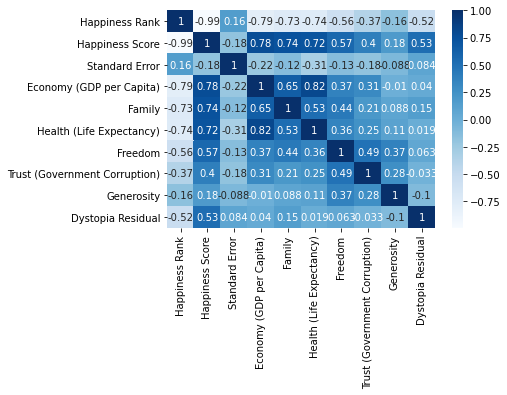

In [17]:
sns.heatmap(dfcor,cmap='Blues',annot=True)

there is high correlation between happiness score and Economy GDP per Capita,family and health and low correlation between happiness score, generosity and trust govt corruption. Happiness rank has negative correlation with standard error and happiness rank

In [18]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

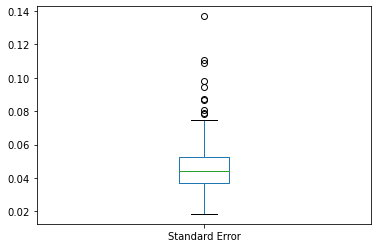

In [20]:
df['Standard Error'].plot.box()

There are outliers in Standard error

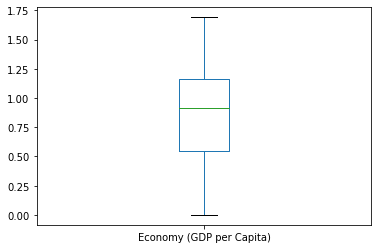

In [21]:
df['Economy (GDP per Capita)'].plot.box()

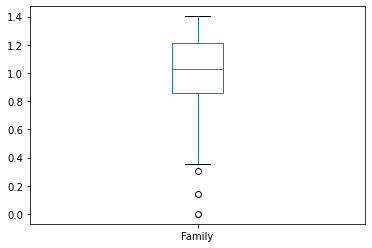

In [22]:
df['Family'].plot.box()

There are outliers in family

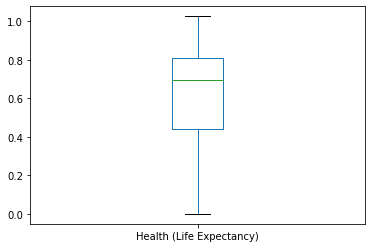

In [23]:
df['Health (Life Expectancy)'].plot.box()

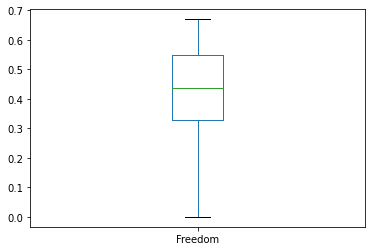

In [24]:
df['Freedom'].plot.box()

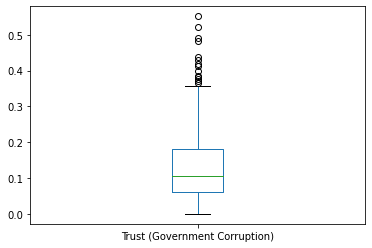

In [26]:
df['Trust (Government Corruption)'].plot.box()

There are outliers in Trust

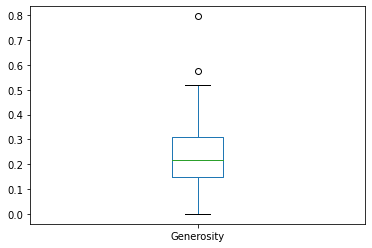

In [27]:
df['Generosity'].plot.box()

In [ ]:
There are outliers in generosity

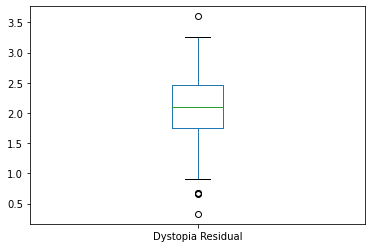

In [28]:
df['Dystopia Residual'].plot.box()

there are outliers in Dystopia Residual

In [34]:
new_df=df.drop(['Country','Region','Happiness Rank'],axis=1)

In [35]:
new_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Dropping data not contributing to Happiness score,which has categorical data.

In [36]:
from scipy.stats import zscore

In [37]:
z=np.abs(zscore(new_df))

In [38]:
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [39]:
threshold=3

In [40]:
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [101]:
df_new=new_df[(z<3).all(axis=1)]

In [102]:
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Removing outliers from dataset

In [46]:
new_df.shape

(158, 9)

In [47]:
df_new.shape

(149, 9)

Reducing number of rows from 158 to 149 by removing outliers

In [63]:
new_df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [48]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

no skewness now present in dataset

In [78]:
df_new.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

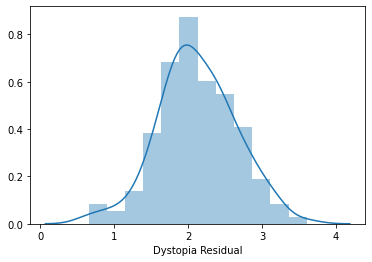

In [49]:
sns.distplot(df_new['Dystopia Residual'])

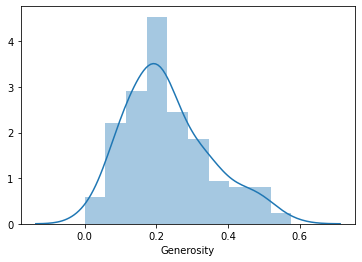

In [50]:
sns.distplot(df_new['Generosity'])

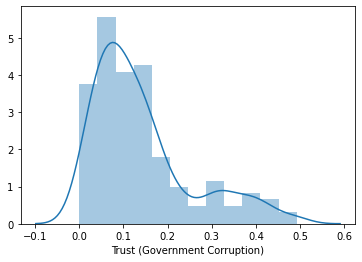

In [51]:
sns.distplot(df_new['Trust (Government Corruption)'])

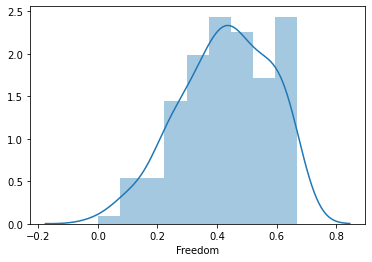

In [52]:
sns.distplot(df_new['Freedom'])

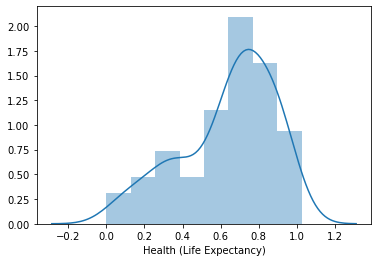

In [53]:
sns.distplot(df_new['Health (Life Expectancy)'])

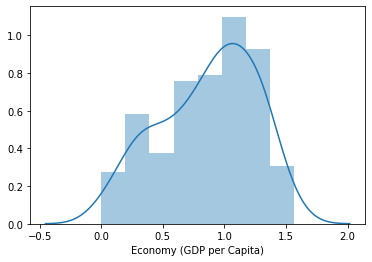

In [54]:
sns.distplot(df_new['Economy (GDP per Capita)'])

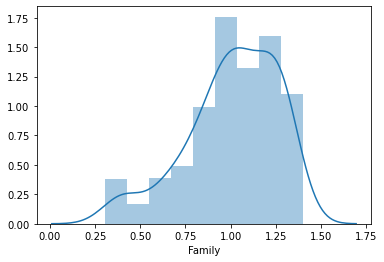

In [55]:
sns.distplot(df_new['Family'])

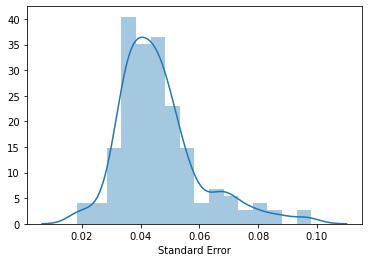

In [56]:
sns.distplot(df_new['Standard Error'])

skewness removed from dataset by removal of outliers

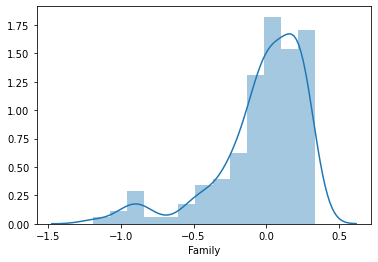

In [103]:
x=df_new.drop('Happiness Score',axis=1)

In [104]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [105]:
y=df_new['Happiness Score']

In [106]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [107]:
x.shape

(149, 8)

In [108]:
y.shape

(149,)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [112]:
from sklearn.linear_model import Lasso,Ridge

In [113]:
from sklearn.svm import SVR

In [114]:
from sklearn.linear_model import ElasticNet

In [122]:
maxScore=0
maxRS=0

In [123]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    score=mod.score(x_train,y_train)
    mod.coef_
    pred=mod.predict(x_test)
    if score>maxScore:
        maxScore=score
        maxRS=i
print('Best score is ',maxScore,'on random state',maxRS)

Best score is  0.9999999509445565 on random state 170


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=170)

In [125]:
lm=LinearRegression()

In [126]:
lm.fit(x_train,y_train)

LinearRegression()

In [127]:
lm.coef_

array([-9.72886909e-04,  1.00001628e+00,  9.99883991e-01,  1.00009808e+00,
        9.99596641e-01,  9.99912735e-01,  1.00019099e+00,  1.00002473e+00])

In [128]:
lm.score(x_train,y_train)

0.9999999509445565

In [129]:
pred=lm.predict(x_test)

In [130]:
print('Predicted Happiness score is ',pred)

Predicted Happiness score is  [6.2946867  4.9594142  5.1288152  5.68878589 5.75433816 4.85760824
 5.09757437 4.36912795 4.29252572 5.19237537 4.07674911 7.36361198
 3.57469263 5.83263342 5.21193667 6.32893172 5.36030297 4.60970871
 7.58685689 5.7586295  3.34007992 4.78648254 2.9046139  4.50709418
 5.33250859 5.0131206  5.6046036  5.00706235 3.6559765  4.87602245
 4.25195275 6.3024267  5.8783041  4.86702727 6.85287601 6.45470466
 4.51445448 5.69530832 4.89743017 4.88444581 3.78083647 5.79056275
 6.12277035 7.11949748 4.63347761]


In [131]:
print('Mean Squared error is ',mean_squared_error(y_test,pred))

Mean Squared error is  1.1392370167922527e-07


In [132]:
print('Mean Absolute error is',mean_absolute_error(y_test,pred))

Mean Absolute error is 0.0002927430387809022


In [133]:
from sklearn.metrics import r2_score

In [134]:
print(r2_score(y_test,pred))

0.9999998916810678


In [135]:
ls=Lasso(alpha=0.0001)

In [136]:
ls.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [137]:
ls.score(x_train,y_train)

0.9999990362172345

In [150]:
lspred=ls.predict(x_test)

In [151]:
lspred

array([6.29505158, 4.96024953, 5.12928588, 5.68902285, 5.75496146,
       4.85951971, 5.09846643, 4.3690808 , 4.29266767, 5.19289133,
       4.0781621 , 7.36129065, 3.57499547, 5.83428213, 5.21288765,
       6.32925142, 5.36042692, 4.61006372, 7.58488504, 5.76026143,
       3.34120231, 4.78617518, 2.90541495, 4.5080251 , 5.33316511,
       5.0143877 , 5.60526163, 5.00762823, 3.65627375, 4.87482293,
       4.25288894, 6.30100296, 5.87773811, 4.86867407, 6.85231227,
       6.45346507, 4.51421223, 5.69519143, 4.89823576, 4.88457174,
       3.78072965, 5.79131324, 6.12260971, 7.11868308, 4.63437712])

In [152]:
print('Mean Absolute error is',mean_absolute_error(y_test,lspred))

Mean Absolute error is 0.0007745042174724443


In [138]:
ls.coef_

array([-0.        ,  1.00124613,  0.99899273,  0.99833252,  0.9994451 ,
        0.99462993,  0.99565001,  0.99987735])

In [139]:
rd=Ridge(alpha=0.0001)

In [140]:
rd.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [141]:
rd.score(x_train,y_train)

0.999999950857427

In [142]:
rd.coef_

array([-0.00114926,  1.00002656,  0.99987584,  1.00008065,  0.99959457,
        0.99986153,  1.00014525,  1.00002355])

In [148]:
rdpred=rd.predict(x_test)

In [149]:
rdpred

array([6.29468917, 4.95942125, 5.12881595, 5.68878525, 5.75433764,
       4.85762561, 5.09758235, 4.36912139, 4.29252524, 5.19237895,
       4.07676366, 7.36359091, 3.57469864, 5.83265076, 5.21194792,
       6.32893621, 5.36030703, 4.60971382, 7.5868388 , 5.75864552,
       3.34009297, 4.78648262, 2.90461528, 4.50709957, 5.332516  ,
       5.01313524, 5.60460916, 5.00706601, 3.65598191, 4.87600651,
       4.25196219, 6.30241219, 5.87829851, 4.867036  , 6.85286813,
       6.45469365, 4.51445435, 5.69530418, 4.8974301 , 4.88444123,
       3.78083504, 5.79057006, 6.1227676 , 7.11948968, 4.63348631])

In [153]:
print('Mean Absolute error is',mean_absolute_error(y_test,rdpred))

Mean Absolute error is 0.0002925318394361338


In [143]:
enr=ElasticNet(alpha=0.0001)

In [144]:
enr.fit(x_train,y_train)

ElasticNet(alpha=0.0001)

In [145]:
enr.score(x_train,y_train)

0.9999990409045099

In [146]:
enrpred=enr.predict(x_test)

In [147]:
enrpred

array([6.29504603, 4.96024891, 5.12928349, 5.6890208 , 5.75495814,
       4.85951803, 5.09846393, 4.36908356, 4.2926682 , 5.19289307,
       4.07815928, 7.36129605, 3.57499701, 5.8342776 , 5.2128853 ,
       6.32924922, 5.36042699, 4.61006623, 7.58488906, 5.76025682,
       3.34119979, 4.7861789 , 2.9054196 , 4.50802051, 5.33316558,
       5.01438438, 5.6052616 , 5.00762744, 3.65627498, 4.87482643,
       4.25288466, 6.30100339, 5.87773826, 4.8686657 , 6.85231041,
       6.45346391, 4.51421564, 5.69519106, 4.89823353, 4.88457069,
       3.78073294, 5.79130826, 6.12260793, 7.1186806 , 4.63437344])

In [165]:
print('Mean Absolute error is',mean_absolute_error(y_test,enrpred))

Mean Absolute error is 0.0007731998685770335


Best model is linear regression since difference of score and mean absolute error is least

In [183]:
Final_mod=LinearRegression()

In [184]:
Final_mod.fit(x_train,y_train)

LinearRegression()

In [187]:
pred=Final_mod.predict(x_test)
pred

array([6.2946867 , 4.9594142 , 5.1288152 , 5.68878589, 5.75433816,
       4.85760824, 5.09757437, 4.36912795, 4.29252572, 5.19237537,
       4.07674911, 7.36361198, 3.57469263, 5.83263342, 5.21193667,
       6.32893172, 5.36030297, 4.60970871, 7.58685689, 5.7586295 ,
       3.34007992, 4.78648254, 2.9046139 , 4.50709418, 5.33250859,
       5.0131206 , 5.6046036 , 5.00706235, 3.6559765 , 4.87602245,
       4.25195275, 6.3024267 , 5.8783041 , 4.86702727, 6.85287601,
       6.45470466, 4.51445448, 5.69530832, 4.89743017, 4.88444581,
       3.78083647, 5.79056275, 6.12277035, 7.11949748, 4.63347761])

In [188]:
score=Final_mod.score(x_train,y_train)

In [189]:
score

0.9999999509445565

In [190]:
import joblib

In [192]:
joblib.dump(Final_mod,'Happiness_Score.pkl')

['Happiness_Score.pkl']